In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\galin\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\galin\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [2]:
max([max(text) for text in train_data])

9999

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for key, value in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [6]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [7]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation="relu", input_shape=(10000, )))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy, 
              metrics=[metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 55ms/step - loss: 0.6076 - binary_accuracy: 0.6774 - val_loss: 0.4169 - val_binary_accuracy: 0.8495
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3386 - binary_accuracy: 0.8931 - val_loss: 0.3193 - val_binary_accuracy: 0.8799
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2373 - binary_accuracy: 0.9276 - val_loss: 0.3059 - val_binary_accuracy: 0.8770
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1897 - binary_accuracy: 0.9404 - val_loss: 0.2736 - val_binary_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1506 - binary_accuracy: 0.9535 - val_loss: 0.2774 - val_binary_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1228 - binary_accuracy: 0.9629 - val_loss: 0.2877 - val_binary_accuracy: 0.8873
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - los

In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

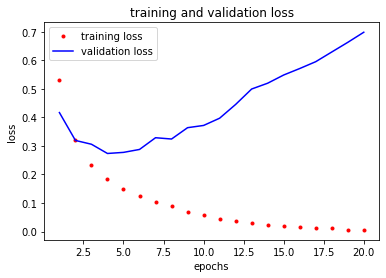

In [21]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r.", label="training loss")
plt.plot(epochs, val_loss_values, "b", label="validation loss")
plt.title("training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

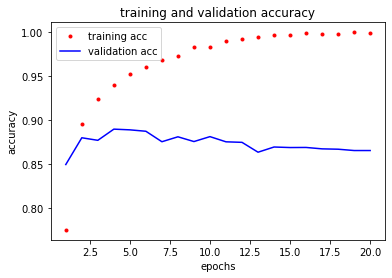

In [23]:
plt.clf()

acc = history_dict["binary_accuracy"]
val_acc = history_dict["val_binary_accuracy"]
plt.plot(epochs, acc, "r.", label="training acc")
plt.plot(epochs, val_acc, "b", label="validation acc")
plt.title("training and validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow as tf
with tf.device('/cpu:0'):
    model = Sequential()
    model.add(Dense(16, activation="relu", input_shape=(10000,)))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x_train, y_train, epochs=4, batch_size=512)
    results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.5364 - accuracy: 0.7473
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2636 - accuracy: 0.9095
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1961 - accuracy: 0.9324
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2980 - accuracy: 0.8824


In [7]:
results

[0.2979913353919983, 0.8823999762535095]

In [8]:
with tf.device('/cpu:0'):
    model.predict(x_test)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow as tf
with tf.device('/cpu:0'):
    model = Sequential()
    model.add(Dense(16, activation="relu", input_shape=(10000,)))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x_train, y_train, epochs=4, batch_size=512)
    results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 16ms/step - loss: 0.5213 - accuracy: 0.7688
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2775 - accuracy: 0.9111
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2192 - accuracy: 0.9280
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2857 - accuracy: 0.8854


[0.28567221760749817, 0.8853600025177002]

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow as tf
with tf.device('/cpu:0'):
    model = Sequential()
    model.add(Dense(16, activation="relu", input_shape=(10000,)))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x_train, y_train, epochs=4, batch_size=512)
    results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 15ms/step - loss: 0.6018 - accuracy: 0.6740
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.3052 - accuracy: 0.9026
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2174 - accuracy: 0.9271
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3037 - accuracy: 0.8800


[0.3036520481109619, 0.8800399899482727]

In [12]:
import tensorflow as tf
with tf.device('/cpu:0'):
    model = Sequential()
    model.add(Dense(64, activation="relu", input_shape=(10000,)))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x_train, y_train, epochs=4, batch_size=512)
    results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 35ms/step - loss: 0.5127 - accuracy: 0.7608
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2487 - accuracy: 0.9051
Epoch 3/4
49/49 [==============================] - 2s 31ms/step - loss: 0.1896 - accuracy: 0.9296
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3164 - accuracy: 0.8790


[0.3164132237434387, 0.8789600133895874]

In [13]:
import tensorflow as tf
with tf.device('/cpu:0'):
    model = Sequential()
    model.add(Dense(64, activation="relu", input_shape=(10000,)))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x_train, y_train, epochs=4, batch_size=512)
    results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 33ms/step - loss: 0.5525 - accuracy: 0.7050
Epoch 2/4
49/49 [==============================] - 2s 31ms/step - loss: 0.2480 - accuracy: 0.9136
Epoch 3/4
49/49 [==============================] - 1s 31ms/step - loss: 0.1934 - accuracy: 0.9302
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3993 - accuracy: 0.8544


[0.3992546498775482, 0.8544399738311768]

In [14]:
import tensorflow as tf
with tf.device('/cpu:0'):
    model = Sequential()
    model.add(Dense(16, activation="relu", input_shape=(10000,)))
    model.add(Dense(32, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x_train, y_train, epochs=4, batch_size=512)
    results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 16ms/step - loss: 0.5461 - accuracy: 0.7245
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2451 - accuracy: 0.9097
Epoch 3/4
49/49 [==============================] - 1s 16ms/step - loss: 0.1806 - accuracy: 0.9354
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3268 - accuracy: 0.8799


[0.32683202624320984, 0.8799200057983398]

In [15]:
import tensorflow as tf
with tf.device('/cpu:0'):
    model = Sequential()
    model.add(Dense(16, activation="relu", input_shape=(10000,)))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(4, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x_train, y_train, epochs=4, batch_size=512)
    results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 3s 14ms/step - loss: 0.5533 - accuracy: 0.7476
Epoch 2/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2842 - accuracy: 0.9064
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2042 - accuracy: 0.9309
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3398 - accuracy: 0.8639


[0.3398360013961792, 0.8638799786567688]

In [16]:
import tensorflow as tf
with tf.device('/cpu:0'):
    model = Sequential()
    model.add(Dense(16, activation="relu", input_shape=(10000,)))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x_train, y_train, epochs=4, batch_size=512)
    results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.5668 - accuracy: 0.7284
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2936 - accuracy: 0.9073
Epoch 3/4
49/49 [==============================] - 1s 14ms/step - loss: 0.2129 - accuracy: 0.9313
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2900 - accuracy: 0.8848


[0.28996700048446655, 0.8848000168800354]

In [17]:
import tensorflow as tf
with tf.device('/cpu:0'):
    model = Sequential()
    model.add(Dense(8, activation="relu", input_shape=(10000,)))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x_train, y_train, epochs=4, batch_size=512)
    results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 17ms/step - loss: 0.5816 - accuracy: 0.7297
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.3540 - accuracy: 0.8971
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2679 - accuracy: 0.9151
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2826 - accuracy: 0.8902


[0.28258171677589417, 0.8902400135993958]

In [19]:
import tensorflow as tf
with tf.device('/cpu:0'):
    model = Sequential()
    model.add(Dense(8, activation="relu", input_shape=(10000,)))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="mse", metrics=["accuracy"])
    model.fit(x_train, y_train, epochs=4, batch_size=512)
    results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1948 - accuracy: 0.7340
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.0963 - accuracy: 0.9041
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.0724 - accuracy: 0.9225
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.0854 - accuracy: 0.8902


[0.08537878841161728, 0.8901600241661072]

In [20]:
import tensorflow as tf
with tf.device('/cpu:0'):
    model = Sequential()
    model.add(Dense(16, activation="relu", input_shape=(10000,)))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="mse", metrics=["accuracy"])
    model.fit(x_train, y_train, epochs=4, batch_size=512)
    results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 16ms/step - loss: 0.1747 - accuracy: 0.7686
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.0836 - accuracy: 0.9109
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.0629 - accuracy: 0.9324
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.0852 - accuracy: 0.8864


[0.08519143611192703, 0.8863999843597412]

In [21]:
import tensorflow as tf
with tf.device('/cpu:0'):
    model = Sequential()
    model.add(Dense(8, activation="tanh", input_shape=(10000,)))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="mse", metrics=["accuracy"])
    model.fit(x_train, y_train, epochs=4, batch_size=512)
    results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 2s 23ms/step - loss: 0.1969 - accuracy: 0.7630
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1153 - accuracy: 0.8928 0s - loss: 0.1207 - 
Epoch 3/4
49/49 [==============================] - 1s 17ms/step - loss: 0.0863 - accuracy: 0.9162
Epoch 4/4
782/782 [==============================] - 5s 1ms/step - loss: 0.0874 - accuracy: 0.8898


[0.08740692585706711, 0.8897600173950195]